# Assignment # 11_ Big Data _ 02423029_ Suleman Khan

# Setting_up Input data with XGBoost

In [2]:
from sklearn import datasets
import xgboost as xgb

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [4]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # if we add random_state=42, we will get the same result every time we run the code and i try i get 1.0

In [16]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [17]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3}

steps = 20  # The number of training iterations

In [18]:
model = xgb.train(param, D_train, steps)

import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9696969696969697
Recall = 0.9629629629629629
Accuracy = 0.9666666666666667


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

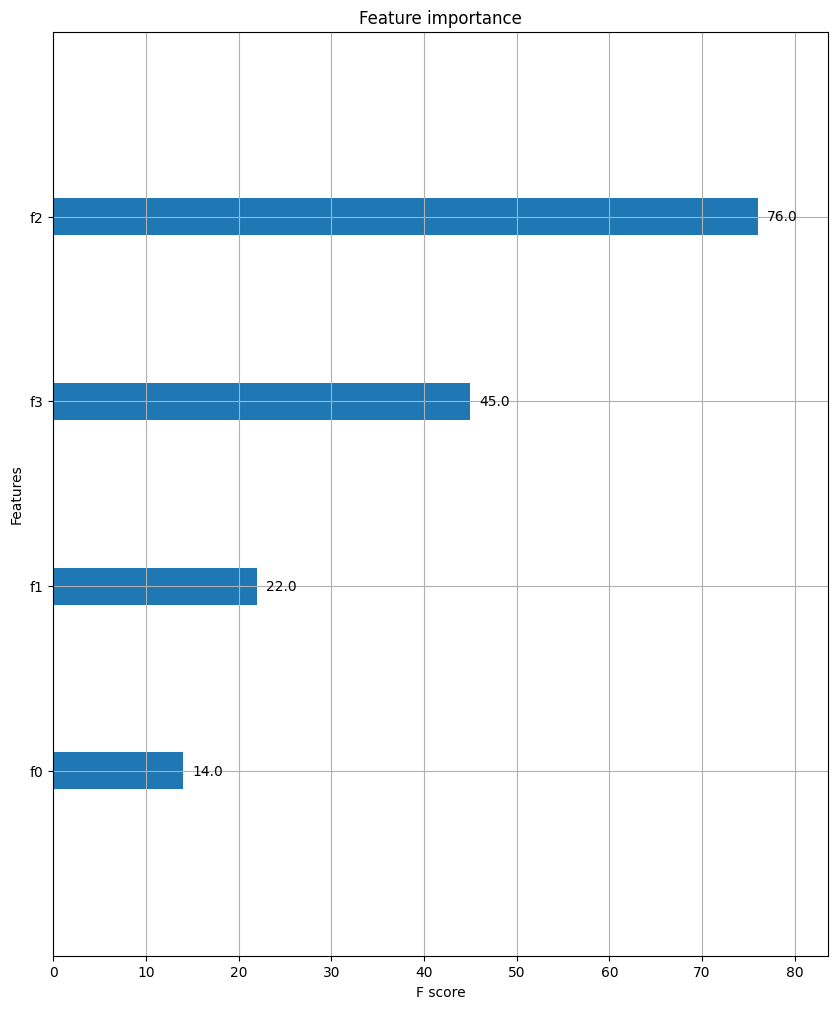

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

flg, ax = plt.subplots(figsize=(10, 12))
xgb.plot_importance(model, ax=ax, max_num_features=50)

# END OF ASSIGNMENT# 11, THANK YOU.